# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [54]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [57]:
data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 3. Assign it to a variable apple

In [92]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv',sep=',')

### Step 4.  Check out the type of the columns

In [90]:
print(apple.dtypes)

index          int64
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


### Step 5. Transform the Date column as a datetime type

In [94]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [69]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [71]:
apple.index.duplicated().any()

False

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [98]:
apple.sort_index(inplace=False)
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 9. Get the last business day of each month

In [75]:
last_business_days = apple.resample('BM').last()
last_business_days.head()

/var/folders/t6/l14298n92xx0dtft2b1m3sqm0000gn/T/ipykernel_66702/79438253.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  last_business_days = apple.resample('BM').last()


,index,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
1980-12-31,8452,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,8431,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,8412,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,8390,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,8369,28.38,28.62,28.38,28.38,3152800,0.44


### Step 10.  What is the difference in days between the first day and the oldest

In [79]:
difference = (apple.index[-1] - apple.index[0]).days
difference

12261

### Step 11.  How many months in the data we have?

In [81]:
months = apple.index.to_period('M').nunique()
months

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

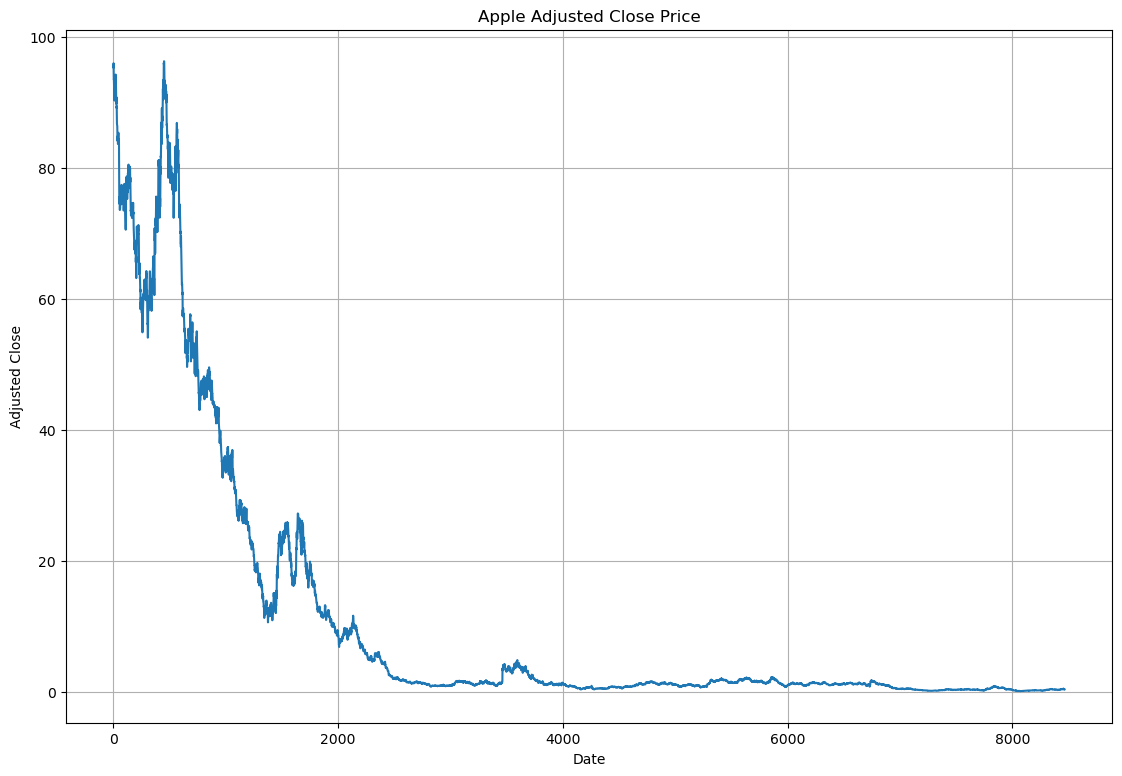

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot()
plt.title('Apple Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close')
plt.grid(True)
plt.show()